<a href="https://colab.research.google.com/github/dnhshl/cc-ai/blob/main/simpleRobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simpleRobot
Neuronales Netz zur Berechnung der inversen Kinematik eines (sehr einfachen) Roboters mit zwei Freiheitsgraden.





In [55]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt


# Daten

Generiere Trainingsdaten. Das ist hier sehr einfach, da bei bekannten Winkeln `phi1` und `phi2` die `x` und `y` Position berechnet werden kann. 

Der Einfachheit halber (um auszuschließen, dass gleiche Positionen mit unterschiedlichen Winkelstellungen angefahren werden können) wird `phi1` auf 0 .. 90 Grad und `phi2` auf -90 .. 90 Grad eingeschränkt.

## Vorab: Vektoren und Matrizen in numpy

In [10]:
a = np.array([1,2,3]) # Zeilenvektor a
b = np.array([4,5,6]) # Zeilenvektor b

M = np.vstack((a, b)) # Zusammenfassen als 2x3 Matrix

M = M.T # Transponieren -> 3x2 Matrix

print(a, b)
print(M)

sum_a_b = M.sum(axis=1) # Summe der Spaltenvektoren
print(sum_a_b)

[1 2 3] [4 5 6]
[[1 4]
 [2 5]
 [3 6]]
[5 7 9]


## OK, jetzt also die Trainingsdaten

In [50]:
l1 = 1  # Länge des ersten Roboterarms
l2 = 1  # Länge des zweiten Roboterarms


traindatasize = 100000 # Wie viele Traingsdaten sollen generiert werden?

# phi1 im Bereich von 0 .. 90 Grad 
phi1train = np.random.random_sample(traindatasize) * np.pi/2 

# phi2 im Bereich von 0 .. -90 Grad 
phi2train = -np.random.random_sample(traindatasize) * np.pi/2

# Kombiniere Vektoren als Matrix
dout = np.vstack((phi1train, phi2train)).T

# Berechne x und y
din = np.array([l1 * np.cos(dout[:,0]) + l2 * np.cos(dout.sum(axis=1)), 
                l1 * np.sin(dout[:,0]) + l2 * np.sin(dout.sum(axis=1))]).T 

print(dout[:4])
print(din[:4])




[[ 1.04365318 -0.80033387]
 [ 1.52140946 -1.09208328]
 [ 0.10460715 -0.80828792]
 [ 0.87875538 -1.42543218]]
[[ 1.47360998  1.10517327]
 [ 0.95861323  1.41503895]
 [ 1.75699945 -0.54261205]
 [ 1.49236673  0.25009404]]


In [ ]:

def plot_range():
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

# Konstruiere NN

Zwei Fully Connected Layer, der erste Layer mit Aktivierungsfunktion.

Als Fehlerfunktion wird der quadratische Fehler genutzt. Als Optimierungsfunktion stochastischer Gradientenabstieg.

In [64]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(100, input_shape=[2,], activation='tanh'),
      layers.Dense(100, activation='tanh'),
      layers.Dense(2)     ## output
  ])

  model.compile(loss='mean_squared_error',
                optimizer=optimizers.SGD(learning_rate=0.01))
  return model

In [68]:
mymodel = build_and_compile_model()
mymodel.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_28 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 202       
Total params: 10,602
Trainable params: 10,602
Non-trainable params: 0
_________________________________________________________________


## Welche Vorhersage liefert das untrainierte Modell?

In [40]:

predicted = mymodel.predict(din[:5])
print(predicted)
print(dout[:5])

[[-0.20692246 -0.43047446]
 [-0.27782518 -0.43620056]
 [-0.18686733 -0.35769653]
 [-0.24229693 -0.4443589 ]
 [-0.23147933 -0.16889742]]
[[ 0.3430418   0.8998665 ]
 [ 1.10182333  0.59959618]
 [ 1.41400316 -1.3849327 ]
 [ 1.42996553 -0.69131346]
 [ 0.10173351 -1.2245569 ]]


## Trainiere Modell

Nutze 20% der Testdaten als Validierungsdatensatz

In [69]:
history = mymodel.fit(din, dout,
          batch_size=32, epochs=10,
          validation_split = 0.2)

Epoch 1/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1082 - val_loss: 0.0632
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0511 - val_loss: 0.0218
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0181 - val_loss: 0.0104
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0097 - val_loss: 0.0079
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0078 - val_loss: 0.0072
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 8/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 9/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 10/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.006

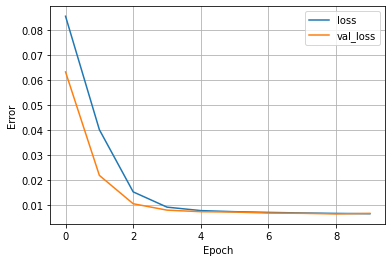

In [70]:


def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [71]:
predictions = mymodel.predict(din)


for i in range(10):
  print(predictions[i], dout[i])

[ 1.002233   -0.70800805] [ 1.04365318 -0.80033387]
[ 1.4930332 -1.0836202] [ 1.52140946 -1.09208328]
[ 0.08824276 -0.79395926] [ 0.10460715 -0.80828792]
[ 0.9314869 -1.5085565] [ 0.87875538 -1.42543218]
[ 0.4996777 -1.0106618] [ 0.52356186 -1.07296112]
[ 1.123345  -0.3690948] [ 1.06156696 -0.26294894]
[ 1.4758186  -0.83249986] [ 1.52878743 -0.90085234]
[ 1.4251401 -0.25895  ] [ 1.41711518 -0.25810921]
[ 0.405667  -1.2314012] [ 0.4028859  -1.25412792]
[ 0.2089364 -1.3887409] [ 0.20934054 -1.39315595]


In [75]:
print(np.min(din[:,0]), np.max(din[:,0]))
print(np.min(din[:,1]), np.max(din[:,1]))

0.009748633683800075 1.9999750322553713
-0.9994296940149731 1.999958213075958


In [72]:
xtest = np.linspace(0.5,1.5)
ytest = xtest

tin = np.vstack((xtest, ytest)).T

phiout = mymodel.predict(tin)

print(phiout)

[[ 2.3065565  -3.4472103 ]
 [ 2.2894375  -3.3950264 ]
 [ 2.2712834  -3.3412263 ]
 [ 2.2521296  -3.2858765 ]
 [ 2.2320118  -3.2290437 ]
 [ 2.2109654  -3.1707923 ]
 [ 2.189026   -3.1111884 ]
 [ 2.166229   -3.0502954 ]
 [ 2.1426086  -2.9881775 ]
 [ 2.1181989  -2.9248993 ]
 [ 2.093033   -2.8605218 ]
 [ 2.0671446  -2.7951057 ]
 [ 2.0405662  -2.728712  ]
 [ 2.013329   -2.6613991 ]
 [ 1.9854637  -2.5932238 ]
 [ 1.957001   -2.524243  ]
 [ 1.9279704  -2.4545105 ]
 [ 1.8984005  -2.38408   ]
 [ 1.8683193  -2.313003  ]
 [ 1.8377547  -2.2413306 ]
 [ 1.8067327  -2.1691115 ]
 [ 1.7752795  -2.0963926 ]
 [ 1.7434199  -2.0232203 ]
 [ 1.7111785  -1.9496399 ]
 [ 1.6785793  -1.8756942 ]
 [ 1.6456454  -1.8014253 ]
 [ 1.6123993  -1.7268728 ]
 [ 1.5788622  -1.6520772 ]
 [ 1.5450556  -1.5770761 ]
 [ 1.5110008  -1.5019057 ]
 [ 1.4767165  -1.4266014 ]
 [ 1.4422226  -1.3511971 ]
 [ 1.4075379  -1.2757268 ]
 [ 1.3726809  -1.2002219 ]
 [ 1.3376689  -1.1247123 ]
 [ 1.3025191  -1.0492278 ]
 [ 1.267248   -0.9737973 ]
 